Iteration: 0. Error: 0.5006490576767629
Iteration: 1000. Error: 0.458459481887301
Iteration: 2000. Error: 0.41182105529493906
Iteration: 3000. Error: 0.3778387275703056
Iteration: 4000. Error: 0.3382222651942177
Iteration: 5000. Error: 0.18618365822409838
Iteration: 6000. Error: 0.0739651935109231
Iteration: 7000. Error: 0.0407963091006595
Iteration: 8000. Error: 0.027293253599374283
Iteration: 9000. Error: 0.020257060372497762
Iteration: 10000. Error: 0.016007756591969496
Iteration: 11000. Error: 0.01318590393486628
Iteration: 12000. Error: 0.011184947845833345
Iteration: 13000. Error: 0.009696572941747701
Iteration: 14000. Error: 0.008548501770161665
Training Complete.
Percentages: 
[[0.99325427]
 [0.9909019 ]
 [0.0035753 ]
 [0.01113015]]
Predictions: 
[[1.]
 [1.]
 [0.]
 [0.]]


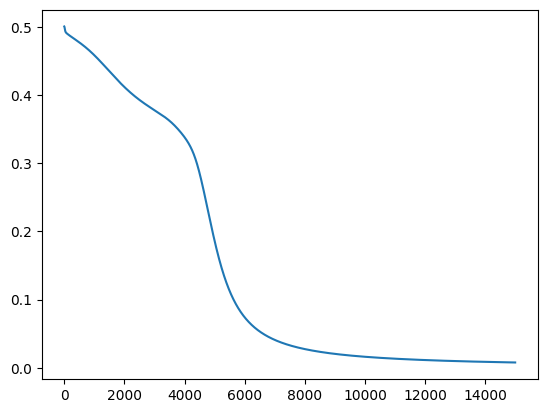

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def forward(x, w1, w2, predict=False):
    a1 = np.dot(x, w1)
    z1 = sigmoid(a1)
    bias = np.ones((len(z1), 1))
    z1 = np.concatenate((bias, z1), axis=1)
    a2 = np.dot(z1, w2)
    z2 = sigmoid(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

def backprop(a2, z0, z1, z2, y):

    delta2 = z2 - y
    Delta2 = np.matmul(z1.T, delta2)
    delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_deriv(a1)
    Delta1 = np.matmul(z0.T, delta1)
    return delta2, Delta1, Delta2

X = np.array([[1, 1, 0],
              [1, 0, 1],
              [1, 0, 0],
              [1, 1, 1]])
y = np.array([[1], [1], [0], [0]])

w1 = np.random.randn(3, 5)
w2 = np.random.randn(6, 1)

lr = 0.09

costs = []

epochs =15000

m = len(X)
for i in range (epochs):

    # Forward 
    a1, z1, a2, z2 = forward(X, w1, w2)

    # Backprop
    delta2, Delta1, Delta2 = backprop(a2, X, z1, z2, y)

    w1 -= lr*(1/m)*Delta1
    w2 -= lr*(1/m)*Delta2
    c = np.mean(np.abs(delta2))
    costs.append(c)

    if i % 1000 == 0:
       print(f"Iteration: {i}. Error: {c}" )

print("Training Complete.")

z3 = forward(X, w1, w2, True)
print("Percentages: ")
print(z3)
print("Predictions: ")
print(np.round(z3))

plt.plot(costs)
plt.show()